In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
df = pd.read_csv('Resources_Clean/visualization_protein.csv')

In [3]:
df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,On,O00391,O00533,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
0,55_0,55,0,10.0,6.0,15.0,0.0,0,11254.3,732430.0,...,365475.0,35528.0,97005.6,23122.5,60912.6,408698.0,0.0,29758.8,23833.7,18953.5
1,55_6,55,6,8.0,10.0,34.0,0.0,0,13163.6,630465.0,...,405676.0,30332.6,109174.0,23499.8,51655.8,369870.0,0.0,22935.2,17722.5,16642.7
2,55_12,55,12,10.0,10.0,41.0,0.0,1,15257.6,815083.0,...,303953.0,43026.2,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9
3,55_36,55,36,17.0,18.0,51.0,0.0,1,13530.8,753832.0,...,303597.0,48188.4,109794.0,23930.6,70223.5,377550.0,74976.1,31732.6,22186.5,21717.1
4,942_6,942,6,8.0,2.0,21.0,0.0,0,11218.7,399518.0,...,253373.0,27431.8,93796.7,17450.9,21299.1,306621.0,82335.5,24018.7,18939.5,15251.2


In [4]:
df['sum_score'] = df[df.filter(regex = 'updrs').columns].sum(axis = 1)
df.drop(df.filter(regex = 'updrs').columns, axis = 1, inplace = True)

<AxesSubplot:xlabel='sum_score'>

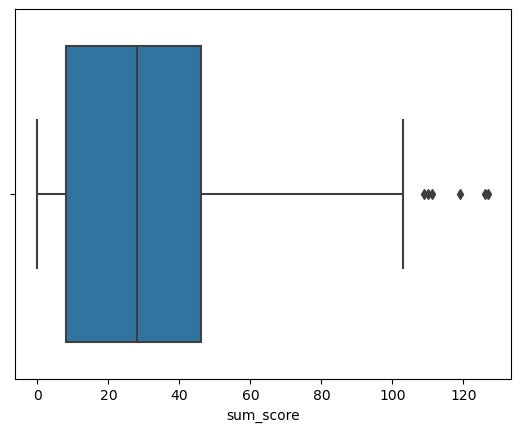

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.boxplot(data = df, x = 'sum_score')

In [6]:
visit_month = df.pivot_table(index = ['visit_month', 'On'], values = ['sum_score'], aggfunc = np.mean).reset_index()

In [7]:
visit_month

,visit_month,On,sum_score
0,0,0,20.374269
1,0,1,41.521739
2,3,0,36.000000
3,6,0,38.364706
4,12,0,24.889706
5,12,1,42.090909
6,18,0,11.500000
7,18,1,21.250000
8,24,0,25.848000
9,24,1,41.229167


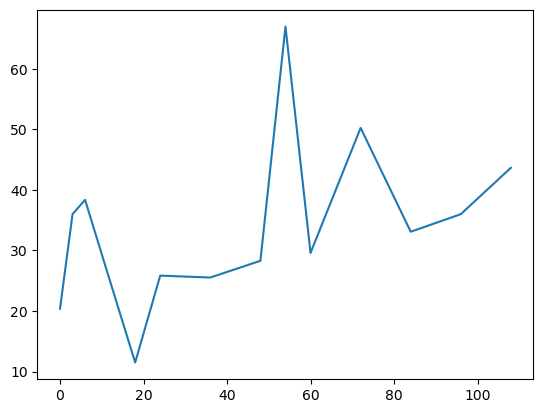

In [8]:
nodrug = visit_month[visit_month['On'] == 0]
plt.plot(nodrug['visit_month'], nodrug['sum_score'])

* There is seasonality in parkinsons as well

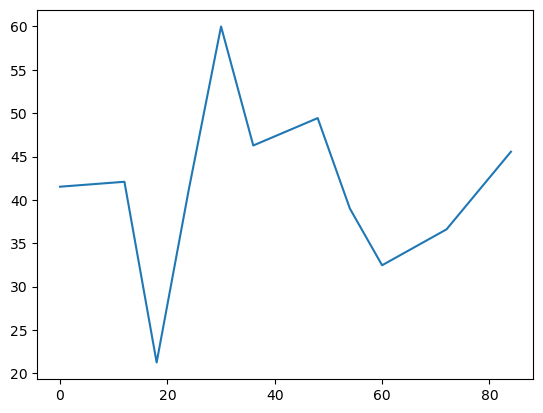

In [9]:
drug = visit_month[visit_month['On'] == 1]
plt.plot(drug['visit_month'], drug['sum_score'])

In [10]:
df2 = pd.read_csv('Resources_Clean/Result_Protein_Peptide_Combine.csv')

In [11]:
df2

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,On,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,62329,62437,62723,62732,62792,63875,63889,64669,64674,65043
0,0,10.0,6.0,15.0,0.0,0,8984260.0,53855.6,8579740.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6,8.0,10.0,34.0,0.0,0,8279770.0,45251.9,8655890.0,49927.5,...,0,0,0,0,0,0,0,0,0,0
2,12,10.0,10.0,41.0,0.0,1,8382390.0,53000.9,8995640.0,45519.2,...,0,0,0,0,0,0,0,0,0,0
3,36,17.0,18.0,51.0,0.0,1,10671500.0,58108.4,9985420.0,52374.0,...,0,0,0,0,0,0,0,0,0,0
4,6,8.0,2.0,21.0,0.0,0,6177730.0,42682.6,3596660.0,25698.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,84,11.0,15.0,45.0,4.0,0,7083630.0,35656.1,6273100.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1064,0,2.0,6.0,16.0,0.0,0,7818630.0,95033.0,5119260.0,57483.7,...,0,0,0,0,0,0,0,0,0,1
1065,12,4.0,7.0,14.0,0.0,0,8070390.0,76532.7,8233520.0,54260.6,...,0,0,0,0,0,0,0,0,0,1
1066,24,4.0,8.0,0.0,0.0,0,7608150.0,75401.6,9168030.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
pt = pd.read_csv('Resources_Clean/vizualization.csv')

In [13]:
pt

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,On,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
0,55_0,55,0,10.0,6.0,15.0,0.0,0,8984260.0,53855.6,...,365475.0,35528.00,97005.6,23122.5,60912.6,408698.0,0.0,29758.8,23833.7,18953.5
1,55_6,55,6,8.0,10.0,34.0,0.0,0,8279770.0,45251.9,...,405676.0,30332.60,109174.0,23499.8,51655.8,369870.0,0.0,22935.2,17722.5,16642.7
2,55_12,55,12,10.0,10.0,41.0,0.0,1,8382390.0,53000.9,...,303953.0,43026.20,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9
3,55_36,55,36,17.0,18.0,51.0,0.0,1,10671500.0,58108.4,...,303597.0,48188.40,109794.0,23930.6,70223.5,377550.0,74976.1,31732.6,22186.5,21717.1
4,942_6,942,6,8.0,2.0,21.0,0.0,0,6177730.0,42682.6,...,253373.0,27431.80,93796.7,17450.9,21299.1,306621.0,82335.5,24018.7,18939.5,15251.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,64674_84,64674,84,11.0,15.0,45.0,4.0,0,7083630.0,35656.1,...,260021.0,7139.93,104277.0,10500.0,21944.2,136725.0,62217.5,0.0,10287.7,13848.2
1064,65043_0,65043,0,2.0,6.0,16.0,0.0,0,7818630.0,95033.0,...,186414.0,25897.80,0.0,21480.7,57364.0,416142.0,37584.6,0.0,28346.5,35617.5
1065,65043_12,65043,12,4.0,7.0,14.0,0.0,0,8070390.0,76532.7,...,301343.0,22343.40,105626.0,20500.8,54011.2,380072.0,40588.9,0.0,17035.7,37064.2
1066,65043_24,65043,24,4.0,8.0,0.0,0.0,0,7608150.0,75401.6,...,300439.0,52143.60,139291.0,19449.2,66569.9,300948.0,36150.4,0.0,21286.3,39587.9


In [14]:
# Checking the number of Patients.
len(pt["patient_id"].unique())

248

In [15]:
pivoted = pt.pivot_table(index = "visit_month", values = "patient_id", aggfunc = "count").reset_index()

In [16]:
# random number Patientès visiting during the month.
pivoted.head()

,visit_month,patient_id
0,0,194
1,3,1
2,6,85
3,12,180
4,18,8


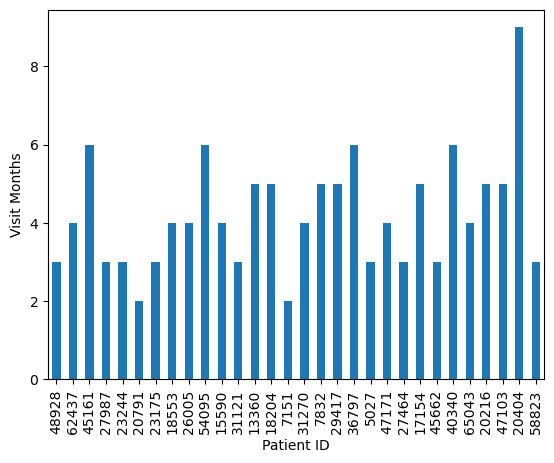

In [17]:
import random

# Set the number of patients to show on the x-axis
num_patients = 30

# Compute the visit counts for each patient
pt = pt["patient_id"].value_counts()

# Get a list of patient IDs
patients = list(pt.index)

# Randomly select num_patients patients to include on the x-axis
selected_patients = random.sample(patients, num_patients)

# Filter the data to only include the selected patients
pt_filtered = pt.loc[selected_patients]

# Plot the filtered data
plot_pandas = pt_filtered.plot.bar(color='tab:blue')
plt.xlabel("Patient ID")
plt.ylabel("Visit Months")
plt.show()

In [18]:
df3 = pd.read_csv("train_clinical_data.csv")

In [19]:
df3

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


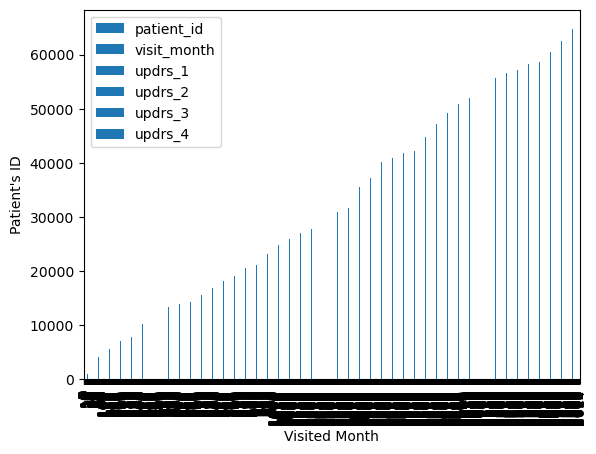

In [20]:
# How many times a patient ID has visited the clinic, during the month. 

plot_pandas = df3.plot.bar(color='tab:blue')  

#xlabel, ylabel
plt.xlabel("Visited Month")
plt.ylabel("Patient's ID")

plt.show()